In [1]:
import pandas as pd
from matplotlib import pyplot
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\jatin\OneDrive\Desktop\Listings-di.csv', encoding= 'unicode_escape')

In [3]:
data.head()

,ï»¿listing_id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Conversion,Price in Ruppes
0,281420,1466919,NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,4693.68
1,3705183,10328771,NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,10627.20
2,4082273,19252768,NaN,NaN,NaN,f,1.0,t,f,Elysee,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,7881.84
3,4797344,10668311,NaN,NaN,NaN,f,1.0,t,t,Vaugirard,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,5136.48
4,4823489,24837558,NaN,NaN,NaN,f,1.0,t,f,Passy,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,5313.60


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188002 entries, 0 to 188001
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ï»¿listing_id                188002 non-null  int64  
 1   host_id                      188002 non-null  int64  
 2   host_response_time           110904 non-null  object 
 3   host_response_rate           110904 non-null  float64
 4   host_acceptance_rate         128812 non-null  float64
 5   host_is_superhost            187894 non-null  object 
 6   host_total_listings_count    187894 non-null  float64
 7   host_has_profile_pic         187894 non-null  object 
 8   host_identity_verified       187894 non-null  object 
 9   neighbourhood                188002 non-null  object 
 10  city                         188002 non-null  object 
 11  latitude                     188002 non-null  float64
 12  longitude                    188002 non-null  float64
 13 

In [5]:
null = data.isnull().sum().sort_values(ascending=False)
#First sum and order all null values for each variable
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False) 
missing_variables = pd.concat([null, percent], axis=1, keys=['Total', 'percent','Data Type'])


In [6]:
missing_variables

,Total,percent
host_response_time,77098,41.009138
host_response_rate,77098,41.009138
host_acceptance_rate,59190,31.483708
bedrooms,19768,10.514782
host_is_superhost,108,0.057446
host_total_listings_count,108,0.057446
host_has_profile_pic,108,0.057446
host_identity_verified,108,0.057446
review_scores_value,78,0.041489
review_scores_location,69,0.036702


In [7]:
data.shape


(188002, 30)

In [8]:
data.describe()

,ï»¿listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Conversion,Price in Ruppes
count,1.880020e+05,1.880020e+05,110904.000000,128812.000000,187894.000000,188002.000000,188002.000000,188002.000000,168234.000000,188002.000000,1.880020e+05,187974.000000,187963.000000,187971.000000,187937.000000,187992.000000,187933.000000,187924.000000,188002.000000,1.880020e+05
mean,2.399413e+07,9.473508e+07,0.896353,0.848483,9.707399,19.705144,9.396443,3.340204,1.497527,7.145030,4.054929e+04,93.411456,9.565712,9.313272,9.701687,9.698913,9.634029,9.335375,168.515008,1.872481e+04
std,1.381311e+07,1.015712e+08,0.246005,0.267815,64.167033,32.645095,72.629009,2.071082,1.033713,32.339681,8.883277e+06,10.039644,0.989956,1.144938,0.866797,0.885699,0.833055,1.042623,339.678690,8.858152e+04
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,1.000000,1.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.470000,1.668812e+02
25%,1.234016e+07,1.458295e+07,0.950000,0.830000,1.000000,-22.963377,-43.207498,2.000000,1.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,4.657214,3.332030e+03
50%,2.382706e+07,4.928889e+07,1.000000,0.990000,1.000000,40.720460,2.372500,3.000000,1.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,82.670000,6.199200e+03
75%,3.622668e+07,1.562045e+08,1.000000,1.000000,4.000000,48.827008,28.963997,4.000000,2.000000,4.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,88.560000,1.231783e+04
max,4.826387e+07,3.893169e+08,1.000000,1.000000,7235.000000,48.904250,151.339730,16.000000,50.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1125.850000,1.125850e+07


In [9]:
	
data["city"].value_counts()

Paris             47990
New York          26750
Sydney            22312
Rome              20822
Rio de Janeiro    16109
Mexico City       14446
Cape Town         13400
Istanbul          11220
Bangkok           11174
Hong Kong          3779
Name: city, dtype: int64

In [10]:
data["host_response_time"].value_counts()

within an hour        65643
within a few hours    21186
within a day          16115
a few days or more     7960
Name: host_response_time, dtype: int64

In [11]:
data["host_has_profile_pic"].value_counts()

t    187567
f       327
Name: host_has_profile_pic, dtype: int64

In [12]:
data["host_identity_verified"].value_counts()

t    146354
f     41540
Name: host_identity_verified, dtype: int64

In [13]:
data["property_type"].value_counts()

Entire apartment             102458
Private room in apartment     28238
Entire house                   8616
Private room in house          8204
Entire condominium             7778
                              ...  
Private room in treehouse         1
Private room in tipi              1
Entire vacation home              1
Shared room in floor              1
Lighthouse                        1
Name: property_type, Length: 125, dtype: int64

In [14]:
grouped_data = data.groupby(['room_type','property_type'])['bedrooms'].count() 
grouped_data = grouped_data.reset_index()
print(grouped_data.head(100))

       room_type              property_type  bedrooms
0   Entire place                       Barn         4
1   Entire place                       Boat        32
2   Entire place                        Bus         1
3   Entire place                  Camper/RV        17
4   Entire place                   Campsite         2
..           ...                        ...       ...
95  Private room       Private room in tipi         1
96  Private room  Private room in townhouse      1794
97  Private room      Private room in train         1
98  Private room  Private room in treehouse         1
99  Private room      Private room in villa       309

[100 rows x 3 columns]


In [15]:
columns = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'review_scores_rating', 'review_scores_accuracy', 'host_total_listings_count','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

for col in columns:
    data[col].fillna(int(data[col].mean()), inplace=True)

In [16]:
cols = ['host_is_superhost', 'host_response_time', 'host_has_profile_pic', 'host_identity_verified']
,
for col in cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [17]:
null = data.isnull().sum().sort_values(ascending=False)
#First sum and order all null values for each variable
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False) 
missing_variables = pd.concat([null, percent], axis=1, keys=['Total', 'percent','Data Type'])


In [18]:
missing_variables

,Total,percent
ï»¿listing_id,0,0.0
host_id,0,0.0
Conversion,0,0.0
instant_bookable,0,0.0
review_scores_value,0,0.0
review_scores_location,0,0.0
review_scores_communication,0,0.0
review_scores_checkin,0,0.0
review_scores_cleanliness,0,0.0
review_scores_accuracy,0,0.0


In [19]:
data.head()

,ï»¿listing_id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Conversion,Price in Ruppes
0,281420,1466919,within an hour,0.0,0.0,f,1.0,t,f,Buttes-Montmartre,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,4693.68
1,3705183,10328771,within an hour,0.0,0.0,f,1.0,t,t,Buttes-Montmartre,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,10627.20
2,4082273,19252768,within an hour,0.0,0.0,f,1.0,t,f,Elysee,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,7881.84
3,4797344,10668311,within an hour,0.0,0.0,f,1.0,t,t,Vaugirard,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,5136.48
4,4823489,24837558,within an hour,0.0,0.0,f,1.0,t,f,Passy,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,5313.60


<AxesSubplot: >

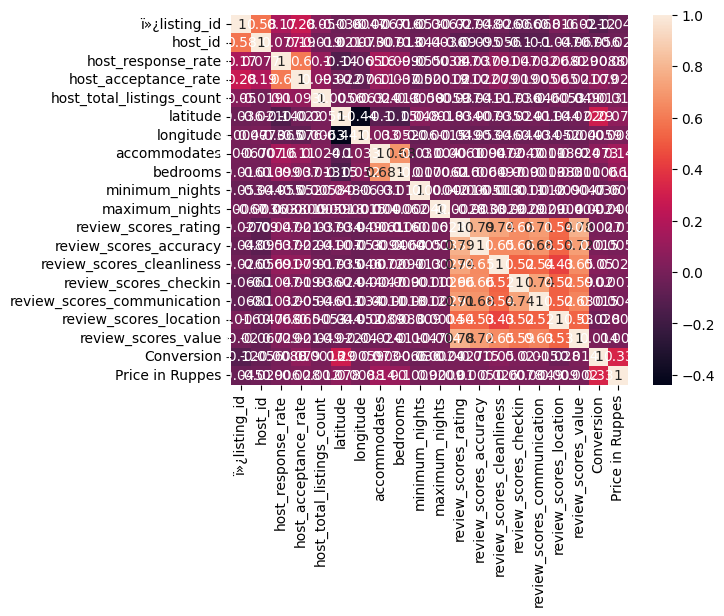

In [20]:
sns.heatmap(data.corr(),annot=True)

In [21]:
target = data['Price in Ruppes']

In [22]:
target = target.to_frame(name='Price')

In [23]:
target.shape

(188002, 1)

In [24]:
data.shape

(188002, 30)

In [25]:
data.head()

,ï»¿listing_id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Conversion,Price in Ruppes
0,281420,1466919,within an hour,0.0,0.0,f,1.0,t,f,Buttes-Montmartre,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,4693.68
1,3705183,10328771,within an hour,0.0,0.0,f,1.0,t,t,Buttes-Montmartre,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,10627.20
2,4082273,19252768,within an hour,0.0,0.0,f,1.0,t,f,Elysee,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,7881.84
3,4797344,10668311,within an hour,0.0,0.0,f,1.0,t,t,Vaugirard,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,5136.48
4,4823489,24837558,within an hour,0.0,0.0,f,1.0,t,f,Passy,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,88.56,5313.60


In [26]:
target.shape

(188002, 1)

In [27]:
vouch = data

In [28]:
data = data.drop('Price in Ruppes', axis=1)


In [29]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

cols = ['host_response_time' , 'host_is_superhost','instant_bookable' ,'host_has_profile_pic','host_identity_verified', 'neighbourhood', 'city', 'property_type','room_type', 'amenities' ] 

for col in cols:
    data[col] = labelencoder.fit_transform(data[col].astype(str))


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188002 entries, 0 to 188001
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ï»¿listing_id                188002 non-null  int64  
 1   host_id                      188002 non-null  int64  
 2   host_response_time           188002 non-null  int32  
 3   host_response_rate           188002 non-null  float64
 4   host_acceptance_rate         188002 non-null  float64
 5   host_is_superhost            188002 non-null  int32  
 6   host_total_listings_count    188002 non-null  float64
 7   host_has_profile_pic         188002 non-null  int32  
 8   host_identity_verified       188002 non-null  int32  
 9   neighbourhood                188002 non-null  int32  
 10  city                         188002 non-null  int32  
 11  latitude                     188002 non-null  float64
 12  longitude                    188002 non-null  float64
 13 

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data,target)


LinearRegression()

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Fit a linear regression model to the data
reg = LinearRegression().fit(X_train, y_train)
y_pred_linear = reg.predict(X_test)

# Fit a Lasso Regression model to the data
reg_lasso = Lasso(alpha=0.01).fit(X_train, y_train)
y_pred_lasso = reg_lasso.predict(X_test)

# Fit a Ridge Regression model to the data
reg_ridge = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred_ridge = reg_ridge.predict(X_test)

# Evaluate the models
print("Linear Regression MSE: ", mean_squared_error(y_test, y_pred_linear))
print("Lasso Regression MSE: ", mean_squared_error(y_test, y_pred_lasso))
print("Ridge Regression MSE: ", mean_squared_error(y_test, y_pred_ridge))

# Get the coefficients for each feature
print("Linear Regression Coefficients: ", reg.coef_)
print("Lasso Regression Coefficients: ", reg_lasso.coef_)
print("Ridge Regression Coefficients: ", reg_ridge.coef_)

Linear Regression MSE:  8797086505.536396
Lasso Regression MSE:  8797086523.59583
Ridge Regression MSE:  8797086506.853825
Linear Regression Coefficients:  [[-1.11467576e-05 -7.33688152e-06 -1.35459459e+02 -1.89406474e+03
  -1.86507993e+03  2.77292582e+02  1.05925274e+01  1.22900985e+03
   1.42141629e+03 -6.46439322e+00 -2.17285580e+02 -2.44374215e+01
   2.21275858e+00  5.27710824e+01 -2.14067291e+03  3.40863324e+03
   3.17282340e+03 -2.55702674e-03  1.36251474e+01 -3.47511250e-06
   2.05054767e+02 -1.40667868e+03  8.92473971e+02 -7.06894015e+02
  -9.72556920e+02  2.75316450e+03 -1.51403139e+03  1.92299229e+03
   8.57620508e+01]]
Lasso Regression Coefficients:  [-1.11469256e-05 -7.33695788e-06 -1.35432214e+02 -1.89399776e+03
 -1.86498574e+03  2.77196407e+02  1.05925095e+01  1.22329047e+03
  1.42135861e+03 -6.46438396e+00 -2.17282324e+02 -2.44373054e+01
  2.21281823e+00  5.27697403e+01 -2.14063206e+03  3.40863655e+03
  3.17281136e+03 -2.55707853e-03  1.36251354e+01 -3.47509156e-06
  2.0

In [34]:
import numpy as np

coeffs = np.array([-1.74859272e-19,  1.35525272e-20,  1.52002003e-10, -7.75120969e-11,
   2.85987548e-11, -2.13514396e-12, -2.05091371e-14, -3.73857815e-12,
  -2.94103757e-12,  2.23615033e-14,  3.16876708e-12,  1.40588561e-13,
  -5.46170653e-15, -2.21918378e-14,  3.34246052e-12, -6.57246704e-12,
  -6.56751813e-12, -2.25387104e-16, -3.47982999e-14, -4.23926027e-17,
  -4.74644036e-13,  2.76424570e-12, -1.54064179e-12,  2.33968662e-12,
   2.00590921e-12, -6.59905828e-12,  3.86714424e-12, -1.74463875e-12,
  -2.21607607e-13,  1.00000000e+00])

# sort the coefficients in descending order
sorted_coeffs = np.sort(coeffs)[::-1]

# get the indices of the sorted coefficients
sorted_coeffs_indices = np.argsort(coeffs)[::-1]

# print the sorted coefficients and their indices
for i, coeff in enumerate(sorted_coeffs):
    print(f"Feature {sorted_coeffs_indices[i]+1}: {coeff}")

Feature 30: 1.0
Feature 3: 1.52002003e-10
Feature 5: 2.85987548e-11
Feature 27: 3.86714424e-12
Feature 15: 3.34246052e-12
Feature 11: 3.16876708e-12
Feature 22: 2.7642457e-12
Feature 24: 2.33968662e-12
Feature 25: 2.00590921e-12
Feature 12: 1.40588561e-13
Feature 10: 2.23615033e-14
Feature 2: 1.35525272e-20
Feature 1: -1.74859272e-19
Feature 20: -4.23926027e-17
Feature 18: -2.25387104e-16
Feature 13: -5.46170653e-15
Feature 7: -2.05091371e-14
Feature 14: -2.21918378e-14
Feature 19: -3.47982999e-14
Feature 29: -2.21607607e-13
Feature 21: -4.74644036e-13
Feature 23: -1.54064179e-12
Feature 28: -1.74463875e-12
Feature 6: -2.13514396e-12
Feature 9: -2.94103757e-12
Feature 8: -3.73857815e-12
Feature 17: -6.56751813e-12
Feature 16: -6.57246704e-12
Feature 26: -6.59905828e-12
Feature 4: -7.75120969e-11


In [35]:
reg.score(X_train,y_train)

0.13124341574806853

In [36]:
y_preds = reg_lasso.predict(X_test)
y_preds

array([24542.23656934,  1857.11140564,  7959.50376744, ...,
       10646.85135738, 20500.26399398, 12095.10353135])

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_preds)


0.10980934672105058

In [38]:
fig, axs = plt.subplots(1,3,sharey=True)
vouch.plot(kind='bar',x='host_response_time',y='Price in Ruppes',ax=axs[0],figsize=(16,8))
vouch.plot(kind='bar',x='review_scores_value',y='Price in Ruppes',ax=axs[1])
vouch.plot(kind='bar',x='room_type',y='Price in Ruppes',ax=axs[2])
